## Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/perception/images.zip

In [ ]:
df = pd.read_json("/content/drive/MyDrive/perception/keypoints.json")

In [ ]:
df.head()

,vid_37_frame_400_3.jpg,vid_37_frame_346_0.jpg,vid_37_frame_208_3.jpg,vid_36_frame_54_5.jpg,vid_37_frame_204_4.jpg,vid_37_frame_425_6.jpg,vid_37_frame_245_6.jpg,vid_37_frame_357_7.jpg,vid_37_frame_245_3.jpg,vid_37_frame_255_8.jpg,...,vid_38_frame_758_16.jpg,vid_62_frame_52_3.jpg,vid_56_frame_178_1.jpg,vid_64_frame_74_0.jpg,vid_42_frame_777_7.jpg,vid_38_frame_575_6.jpg,vid_42_frame_439_2.jpg,vid_38_frame_937_1.jpg,vid_62_frame_74_2.jpg,vid_53_frame_134_3.jpg
0,"[37, 1]","[41, 5]","[47, 1]","[44, 0]","[29, 0]","[44, 6]","[44, 5]","[26, 0]","[29, 2]","[50, 2]",...,"[51, 2]","[36, 1]","[37, 2]","[36, 3]","[33, 6]","[41, 4]","[32, 3]","[37, 1]","[46, 5]","[35, 3]"
1,"[18, 26]","[25, 26]","[26, 27]","[28, 24]","[14, 25]","[29, 26]","[27, 27]","[14, 20]","[21, 25]","[29, 26]",...,"[36, 22]","[25, 24]","[25, 26]","[25, 28]","[24, 26]","[25, 25]","[19, 25]","[24, 23]","[32, 30]","[25, 30]"
2,"[50, 28]","[56, 26]","[59, 25]","[60, 24]","[41, 25]","[53, 26]","[57, 27]","[41, 19]","[43, 23]","[64, 26]",...,"[58, 24]","[49, 24]","[49, 26]","[47, 28]","[49, 26]","[51, 25]","[45, 25]","[50, 22]","[56, 31]","[47, 28]"
3,"[13, 41]","[21, 45]","[23, 42]","[24, 43]","[9, 46]","[23, 45]","[22, 43]","[12, 41]","[18, 42]","[21, 44]",...,"[28, 40]","[19, 46]","[22, 42]","[23, 45]","[18, 45]","[25, 42]","[17, 49]","[18, 43]","[27, 48]","[22, 43]"
4,"[50, 43]","[60, 45]","[62, 42]","[60, 43]","[46, 46]","[59, 47]","[63, 43]","[48, 40]","[50, 40]","[66, 44]",...,"[60, 41]","[54, 45]","[51, 42]","[49, 45]","[58, 43]","[57, 42]","[49, 47]","[55, 41]","[60, 51]","[52, 42]"


## Transposing Dataframe & Loading images

In [ ]:
# change header file to a column
df =df.transpose()

In [ ]:
df.head()

,0,1,2,3,4,5,6
vid_37_frame_400_3.jpg,"[37, 1]","[18, 26]","[50, 28]","[13, 41]","[50, 43]","[5, 62]","[56, 66]"
vid_37_frame_346_0.jpg,"[41, 5]","[25, 26]","[56, 26]","[21, 45]","[60, 45]","[15, 65]","[69, 65]"
vid_37_frame_208_3.jpg,"[47, 1]","[26, 27]","[59, 25]","[23, 42]","[62, 42]","[11, 66]","[65, 68]"
vid_36_frame_54_5.jpg,"[44, 0]","[28, 24]","[60, 24]","[24, 43]","[60, 43]","[16, 61]","[64, 64]"
vid_37_frame_204_4.jpg,"[29, 0]","[14, 25]","[41, 25]","[9, 46]","[46, 46]","[4, 73]","[58, 71]"


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.columns = ['image_id', 'Point_1',"Point_2","Point_3","Point_4","Point_5","Point_6", "Point 7"]
df.head()

,image_id,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point 7
0,vid_37_frame_400_3.jpg,"[37, 1]","[18, 26]","[50, 28]","[13, 41]","[50, 43]","[5, 62]","[56, 66]"
1,vid_37_frame_346_0.jpg,"[41, 5]","[25, 26]","[56, 26]","[21, 45]","[60, 45]","[15, 65]","[69, 65]"
2,vid_37_frame_208_3.jpg,"[47, 1]","[26, 27]","[59, 25]","[23, 42]","[62, 42]","[11, 66]","[65, 68]"
3,vid_36_frame_54_5.jpg,"[44, 0]","[28, 24]","[60, 24]","[24, 43]","[60, 43]","[16, 61]","[64, 64]"
4,vid_37_frame_204_4.jpg,"[29, 0]","[14, 25]","[41, 25]","[9, 46]","[46, 46]","[4, 73]","[58, 71]"


In [ ]:
"/content/drive/MyDrive/perception/images"

In [ ]:
def read_img(path):
    x = "/content/images/"
    img = Image.open((x+path).strip()) # strip() removes spaces from the beginning and end of the string
    return np.asarray(img)

In [ ]:
df["image_id"] = df['image_id'].apply(read_img)

In [ ]:
df.head()

,image_id,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point 7
0,"[[[94, 70, 44], [94, 70, 44], [94, 70, 44], [9...","[37, 1]","[18, 26]","[50, 28]","[13, 41]","[50, 43]","[5, 62]","[56, 66]"
1,"[[[104, 71, 40], [104, 71, 40], [103, 70, 39],...","[41, 5]","[25, 26]","[56, 26]","[21, 45]","[60, 45]","[15, 65]","[69, 65]"
2,"[[[145, 98, 56], [145, 98, 56], [145, 98, 56],...","[47, 1]","[26, 27]","[59, 25]","[23, 42]","[62, 42]","[11, 66]","[65, 68]"
3,"[[[54, 58, 67], [54, 58, 67], [56, 59, 66], [5...","[44, 0]","[28, 24]","[60, 24]","[24, 43]","[60, 43]","[16, 61]","[64, 64]"
4,"[[[116, 69, 51], [115, 68, 50], [114, 69, 48],...","[29, 0]","[14, 25]","[41, 25]","[9, 46]","[46, 46]","[4, 73]","[58, 71]"


## Splitting Dataset

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["image_id"], df.drop(["image_id"], axis=1), test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2557,), (640,), (2557, 7), (640, 7))

In [ ]:
type(X_train), type(y_train)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

## Adjsuting Data Shape

In [ ]:
# convert to numpy array
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
flattened_array = np.array([item for sublist in y_train for item in sublist])

# Reshape the array to its original shape
y_train = flattened_array.reshape(y_train.shape[0], y_train.shape[1], -1)

In [ ]:
flattened_array = np.array([item for sublist in y_test for item in sublist])

# Reshape the array to its original shape
y_test = flattened_array.reshape(y_test.shape[0], y_test.shape[1], -1)

In [ ]:
y_train.shape, y_test.shape

((2557, 7, 2), (640, 7, 2))

In [ ]:
y_train

array([[[21,  2],
        [15, 28],
        [41, 24],
        ...,
        [51, 41],
        [15, 61],
        [62, 53]],

       [[33,  5],
        [16, 26],
        [46, 24],
        ...,
        [52, 44],
        [ 8, 65],
        [60, 65]],

       [[56,  6],
        [34, 23],
        [64, 28],
        ...,
        [64, 40],
        [15, 44],
        [67, 61]],

       ...,

       [[44,  4],
        [29, 26],
        [56, 26],
        ...,
        [56, 43],
        [17, 61],
        [62, 61]],

       [[36,  2],
        [30, 21],
        [46, 21],
        ...,
        [50, 37],
        [23, 61],
        [53, 61]],

       [[30,  2],
        [20, 26],
        [49, 25],
        ...,
        [53, 41],
        [14, 68],
        [59, 63]]])

## Plotting Data

[[44  2]
 [32 22]
 [57 22]
 [25 43]
 [60 45]
 [19 61]
 [64 64]]


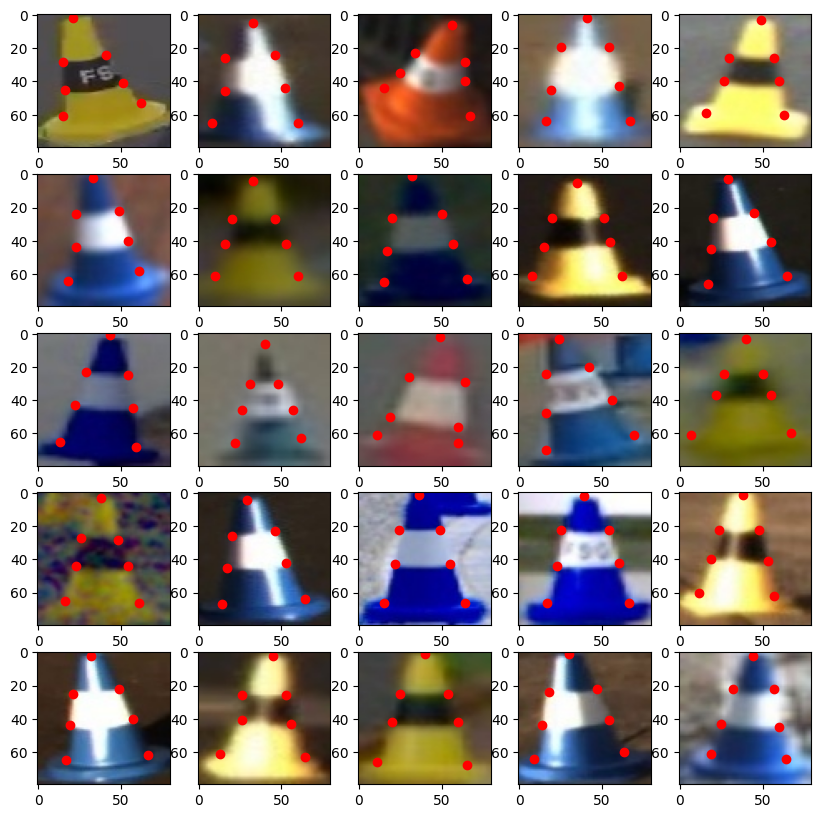

In [ ]:
plt.figure(figsize =(10,10))                      #Displaying the test dataset
for n in range(25):
    ax = plt.subplot(5,5,n+1)
    points = y_train[n].reshape(7,2)
    plt.plot(points[:,0],points[:,1],'ro')
    plt.imshow(X_train[n])
    #plt.axis('off')
print(points)

## Custom Classes for reading data

In [ ]:
class CustomDataSet:
    def __init__(self, images, labels):
        self.labels = labels
        self.images = images

    def __getitem__(self, index):
        image = self.images[index]
        image = image.reshape((3,80,80))
        image = torch.tensor(image, dtype=torch.float64)
        label = self.labels[index]
        return image, label

    def __len__(self):
        return len(self.labels)

In [ ]:
dataset = CustomDataSet(X_train, y_train)

img, keypoitns = dataset[0]
img.shape

torch.Size([3, 80, 80])

In [ ]:
keypoitns

array([[21,  2],
       [15, 28],
       [41, 24],
       [16, 45],
       [51, 41],
       [15, 61],
       [62, 53]])

In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

imgs, labels = next(iter(dataloader))

In [ ]:
imgs.shape, labels.shape

(torch.Size([64, 3, 80, 80]), torch.Size([64, 7, 2]))

In [ ]:
import torch
import torch.nn as nn


class IdentityBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(IdentityBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding='same')
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding='same')
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding='same')
    def forward(self, x):
        identity = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        print(identity.shape)

        identity= self.conv3(identity)
        print(identity.shape)
        print(x.shape)

        x += identity
        x = self.relu2(x)

        return x


class ResNet(nn.Module):
    def __init__(self, input_shape, num_classes=14):
        super(ResNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=1, padding='same')
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        self.identity_block1 = IdentityBlock(64, 64)
        self.identity_block2 = IdentityBlock(64, 128)
        self.identity_block3 = IdentityBlock(128, 256)
        self.identity_block4 = IdentityBlock(256, 512)

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(512 * (input_shape[1]) * (input_shape[2]), num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.identity_block1(x)
        x = self.identity_block2(x)
        x = self.identity_block3(x)
        x = self.identity_block4(x)

        x = self.flatten(x)
        print(x.shape)
        x = self.fc(x)

        return x

# Creating an instance of the ResNet model
input_shape = (64, 80, 80, 3)  # Example input shape

model = ResNet(input_shape)

# Print the model architecture
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (identity_block1): IdentityBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
  )
  (identity_block2): IdentityBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3,

In [ ]:
imgs, keypoints = next(iter(dataloader))
imgs = imgs.type(torch.float64)
keypoints = keypoints.type(torch.float64)

In [ ]:
x = torch.randn((1,3, 80,80))
y = model(x)
y.shape

torch.Size([1, 64, 80, 80])
torch.Size([1, 64, 80, 80])
torch.Size([1, 64, 80, 80])
torch.Size([1, 64, 80, 80])
torch.Size([1, 128, 80, 80])
torch.Size([1, 128, 80, 80])
torch.Size([1, 128, 80, 80])
torch.Size([1, 256, 80, 80])
torch.Size([1, 256, 80, 80])
torch.Size([1, 256, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 512, 80, 80])
torch.Size([1, 3276800])


torch.Size([1, 14])